In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Custom color palette for states visualization
# Using distinct colors for common Indian states
state_colors = {
    'Tamil Nadu': '#003f5c',
    'Maharashtra': '#2f4b7c', 
    'Uttar Pradesh': '#665191',
    'Delhi': '#a05195',
    'Rajasthan': '#d45087',
    'West Bengal': '#f95d6a',
    'Kerala': '#ff7c43',
    'Bihar': '#ffa600',
    'Goa': '#7F2CCB',
    'Karnataka': '#00CC96',
    'Andhra Pradesh': '#EF553B',
    'Telangana': '#636EFA',
    'Madhya Pradesh': '#AB63FA',
    'Punjab': '#19D3F3',
    'Haryana': '#FD3216',
    'Gujarat': '#FF9DA6',
    'Assam': '#FFBF00',
    'Odisha': '#4B0082',
    'Himachal Pradesh': '#8B4513',
    'Jammu & Kashmir': '#006400'
}

In [3]:
domestic_df = pd.read_csv("Top 10 State Visit.csv")
foreign_df = pd.read_csv("Top10 State FFA Visit.csv")
domestic_df

,year,top1_state,top1_ftv,top2_state,top2_ftv,top3_state,top3_ftv,top4_state,top4_ftv,top5_state,...,top6_state,top6_ftv,top7_state,top7_ftv,top8_state,top8_ftv,top9_state,top9_ftv,top10_state,top10_ftv
0,2014.0,Tamil Nadu,327555233,Uttar Pradesh,182820108,Karnataka,118283220,Maharashtra,94127124,Andhra Pradesh,...,Telengana,72399113,Madhya Pradesh,63614525,West Bengal,49029590,Jharkhand,33427144,Rajasthan,33076491
1,2015.0,Tamil Nadu,333459047,Uttar Pradesh,204888457,Andhra Pradesh,121591054,Karnataka,119863942,Maharashtra,...,Telengana,94516316,Madhya Pradesh,77975738,West Bengal,70193450,Gujarat,36288463,Rajasthan,35187573
2,2016.0,Tamil Nadu,343812413,Uttar Pradesh,211707090,Andhra Pradesh,153163352,Madhya Pradesh,150490339,Karnataka,...,Maharashtra,116515801,Telengana,95160830,West Bengal,74460250,Gujarat,42252909,Rajasthan,41495115
3,2017.0,Tamil Nadu,385909376,Uttar Pradesh,233977619,Karnataka,179980191,Andhra Pradesh,165433898,Maharashtra,...,Telengana,85266596,West Bengal,79687645,Madhya Pradesh,78038522,Gujarat,48343121,Rajasthan,45916573
4,2018.0,Tamil Nadu,385909376,Uttar Pradesh,285079848,Karnataka,214306456,Andhra Pradesh,194767874,Maharashtra,...,Telengana,92878329,West Bengal,85657365,Madhya Pradesh,83969799,Gujarat,54369873,Rajasthan,50235643
5,2019.0,Uttar Pradesh,535855162,Tamil Nadu,494865257,Andhra Pradesh,237051508,Karnataka,227934714,Maharashtra,...,West Bengal,92366025,Madhya Pradesh,88707139,Telengana,83035894,Gujarat,58864661,Rajasthan,52220431
6,2020.0,Tamil Nadu,140651241,Uttar Pradesh,86122293,Karnataka,77453339,Andhra Pradesh,70828590,Telengana,...,Maharashtra,39234591,West Bengal,28841732,Madhya Pradesh,23519632,Gujarat,19464517,Punjab,16692197


In [4]:
# Ensure 'year' is a proper integer in both dataframes
domestic_df['year'] = domestic_df['year'].astype(int)
foreign_df['year'] = foreign_df['year'].astype(int)

# Set year as index
domestic_df.set_index('year', inplace=True)
foreign_df.set_index('year', inplace=True)

In [5]:
# Create a combined dataset by prefixing columns
domestic_with_prefix = domestic_df.add_prefix('domestic_')
foreign_with_prefix = foreign_df.add_prefix('foreign_')

# Combine the dataframes
combined_df = pd.concat([domestic_with_prefix, foreign_with_prefix], axis=1)
combined_df

,domestic_top1_state,domestic_top1_ftv,domestic_top2_state,domestic_top2_ftv,domestic_top3_state,domestic_top3_ftv,domestic_top4_state,domestic_top4_ftv,domestic_top5_state,domestic_top5_ftv,...,foreign_top6_state,foreign_top6_ftv,foreign_top7_state,foreign_top7_ftv,foreign_top8_state,foreign_top8_ftv,foreign_top9_state,foreign_top9_ftv,foreign_top10_state,foreign_top10_ftv
year,,,,,,,,,,,,,,,,,,,,,
2014,Tamil Nadu,327555233,Uttar Pradesh,182820108,Karnataka,118283220,Maharashtra,94127124,Andhra Pradesh,93306974,...,West Bengal,1375740,Kerala,923366,Bihar,829508,Karnataka,561870,Harayana,547367
2015,Tamil Nadu,333459047,Uttar Pradesh,204888457,Andhra Pradesh,121591054,Karnataka,119863942,Maharashtra,103403934,...,Rajasthan,1475311,Kerala,977479,Bihar,923737,Karnataka,636502,Goa,541480
2016,Tamil Nadu,343812413,Uttar Pradesh,211707090,Andhra Pradesh,153163352,Madhya Pradesh,150490339,Karnataka,129762600,...,Rajasthan,1513729,Kerala,1038419,Bihar,1010531,Goa,680683,Punjab,659736
2017,Tamil Nadu,385909376,Uttar Pradesh,233977619,Karnataka,179980191,Andhra Pradesh,165433898,Maharashtra,119191539,...,West Bengal,1574915,Punjab,1108635,Kerala,1091870,Bihar,1082705,Goa,842220
2018,Tamil Nadu,385909376,Uttar Pradesh,285079848,Karnataka,214306456,Andhra Pradesh,194767874,Maharashtra,119191539,...,West Bengal,1617105,Punjab,1200969,Kerala,1096407,Bihar,1087971,Goa,933841
2019,Uttar Pradesh,535855162,Tamil Nadu,494865257,Andhra Pradesh,237051508,Karnataka,227934714,Maharashtra,149294703,...,Rajasthan,1605560,Kerala,1189771,Punjab,1101343,Bihar,1093141,Goa,937113
2020,Tamil Nadu,140651241,Uttar Pradesh,86122293,Karnataka,77453339,Andhra Pradesh,70828590,Telengana,39997001,...,Rajasthan,446457,Punjab,359114,Kerala,340755,Bihar,308080,Goa,302751


In [6]:
domestic_long = []

for year in domestic_df.index:
    for i in range(1, 11):
        state = domestic_df.loc[year, f'top{i}_state']
        ftv = domestic_df.loc[year, f'top{i}_ftv']
        
        domestic_long.append({
            'year': year,
            'rank': i,
            'state': state,
            'visitors': ftv,
            'type': 'Domestic'
        })

domestic_long_df = pd.DataFrame(domestic_long)

# Reshape foreign data
foreign_long = []

for year in foreign_df.index:
    for i in range(1, 11):
        state = foreign_df.loc[year, f'top{i}_state']
        ftv = foreign_df.loc[year, f'top{i}_ftv']
        
        foreign_long.append({
            'year': year,
            'rank': i,
            'state': state,
            'visitors': ftv,
            'type': 'Foreign'
        })

foreign_long_df = pd.DataFrame(foreign_long)
foreign_long_df

,year,rank,state,visitors,type
0,2014,1,Tamil Nadu,4657630,Foreign
1,2014,2,Maharashtra,4389098,Foreign
2,2014,3,Uttar Pradesh,2909735,Foreign
3,2014,4,Delhi,2319046,Foreign
4,2014,5,Rajasthan,1525574,Foreign
...,...,...,...,...,...
65,2020,6,Rajasthan,446457,Foreign
66,2020,7,Punjab,359114,Foreign
67,2020,8,Kerala,340755,Foreign
68,2020,9,Bihar,308080,Foreign


In [9]:
# Combine domestic and foreign data
combined_long_df = pd.concat([domestic_long_df, foreign_long_df])

# Create a unique state ID
combined_long_df['state_year_type'] = combined_long_df['state'] + '_' + \
                                        combined_long_df['year'].astype(str) + '_' + \
                                        combined_long_df['type']

# Add a period column (pre-COVID vs COVID)
combined_long_df['period'] = 'Pre-COVID'
combined_long_df.loc[combined_long_df['year'] == 2020, 'period'] = 'COVID'
combined_long_df.to_csv("top_10_states_combined.csv", index=False)
combined_long_df

,year,rank,state,visitors,type,state_year_type,period
0,2014,1,Tamil Nadu,327555233,Domestic,Tamil Nadu_2014_Domestic,Pre-COVID
1,2014,2,Uttar Pradesh,182820108,Domestic,Uttar Pradesh_2014_Domestic,Pre-COVID
2,2014,3,Karnataka,118283220,Domestic,Karnataka_2014_Domestic,Pre-COVID
3,2014,4,Maharashtra,94127124,Domestic,Maharashtra_2014_Domestic,Pre-COVID
4,2014,5,Andhra Pradesh,93306974,Domestic,Andhra Pradesh_2014_Domestic,Pre-COVID
...,...,...,...,...,...,...,...
65,2020,6,Rajasthan,446457,Foreign,Rajasthan_2020_Foreign,COVID
66,2020,7,Punjab,359114,Foreign,Punjab_2020_Foreign,COVID
67,2020,8,Kerala,340755,Foreign,Kerala_2020_Foreign,COVID
68,2020,9,Bihar,308080,Foreign,Bihar_2020_Foreign,COVID


In [10]:
print("\n1. Dataset Overview:")
print(f"Time period: {combined_long_df['year'].min()} to {combined_long_df['year'].max()}")

# Identify unique states
domestic_states = set()
foreign_states = set()

for year in domestic_df.index:
    for i in range(1, 11):
        domestic_states.add(domestic_df.loc[year, f'top{i}_state'])

for year in foreign_df.index:
    for i in range(1, 11):
        foreign_states.add(foreign_df.loc[year, f'top{i}_state'])

print(f"\nUnique states in domestic tourism top 10: {len(domestic_states)}")
print(f"Unique states in foreign tourism top 10: {len(foreign_states)}")

common_states = domestic_states.intersection(foreign_states)
print(f"Common states appearing in both domestic and foreign top 10: {len(common_states)}")
print(f"Common states: {sorted(list(common_states))}")

# Identify states that consistently appear in top 10
consistent_domestic_states = []
consistent_foreign_states = []

for state in domestic_states:
    if all(state in [domestic_df.loc[year, f'top{i}_state'] for i in range(1, 11)] for year in domestic_df.index):
        consistent_domestic_states.append(state)

for state in foreign_states:
    if all(state in [foreign_df.loc[year, f'top{i}_state'] for i in range(1, 11)] for year in foreign_df.index):
        consistent_foreign_states.append(state)

print(f"\n2. States consistently in domestic top 10: {consistent_domestic_states}")
print(f"States consistently in foreign top 10: {consistent_foreign_states}")

# Analyze top states for domestic and foreign tourism
print("\n3. Top states analysis:")

# Top domestic states
domestic_grouped = combined_long_df[combined_long_df['type'] == 'Domestic'].groupby('state')['visitors'].sum().sort_values(ascending=False)
print("\nTop 5 states for domestic tourism (total visitors across all years):")
for i, (state, visitors) in enumerate(domestic_grouped.head(5).items(), 1):
    print(f"{i}. {state}: {visitors:,}")

# Top foreign states
foreign_grouped = combined_long_df[combined_long_df['type'] == 'Foreign'].groupby('state')['visitors'].sum().sort_values(ascending=False)
print("\nTop 5 states for foreign tourism (total visitors across all years):")
for i, (state, visitors) in enumerate(foreign_grouped.head(5).items(), 1):
    print(f"{i}. {state}: {visitors:,}")

# Calculate year-over-year growth for top states
print("\n4. Growth trends for top states:")

# Get the top state for each year for domestic tourism
for year in sorted(domestic_df.index)[1:]:  # Start from second year to calculate growth
    prev_year = year - 1
    
    top_state_current = domestic_df.loc[year, 'top1_state']
    top_visitors_current = domestic_df.loc[year, 'top1_ftv']
    
    top_state_prev = domestic_df.loc[prev_year, 'top1_state']
    top_visitors_prev = domestic_df.loc[prev_year, 'top1_ftv']
    
    if top_state_current == top_state_prev:
        growth = ((top_visitors_current / top_visitors_prev) - 1) * 100
        print(f"Domestic: {prev_year} to {year}: {top_state_current} grew by {growth:.2f}%")
    else:
        print(f"Domestic: Top state changed from {top_state_prev} to {top_state_current}")

# Get the top state for each year for foreign tourism
for year in sorted(foreign_df.index)[1:]:  # Start from second year to calculate growth
    prev_year = year - 1
    
    top_state_current = foreign_df.loc[year, 'top1_state']
    top_visitors_current = foreign_df.loc[year, 'top1_ftv']
    
    top_state_prev = foreign_df.loc[prev_year, 'top1_state']
    top_visitors_prev = foreign_df.loc[prev_year, 'top1_ftv']
    
    if top_state_current == top_state_prev:
        growth = ((top_visitors_current / top_visitors_prev) - 1) * 100
        print(f"Foreign: {prev_year} to {year}: {top_state_current} grew by {growth:.2f}%")
    else:
        print(f"Foreign: Top state changed from {top_state_prev} to {top_state_current}")

# Comparison between domestic and foreign tourism
print("\n5. Domestic vs Foreign Tourism Comparison:")

# Calculate total visitors by year and type
yearly_totals = combined_long_df.groupby(['year', 'type'])['visitors'].sum().unstack()

# Calculate ratio of domestic to foreign tourism
yearly_totals['Ratio'] = yearly_totals['Domestic'] / yearly_totals['Foreign']

print("Year | Domestic Visitors | Foreign Visitors | Domestic/Foreign Ratio")
print("-" * 65)

for year, row in yearly_totals.iterrows():
    domestic = row['Domestic']
    foreign = row['Foreign']
    ratio = row['Ratio']
    
    print(f"{year} | {domestic:,} | {foreign:,} | {ratio:.2f}")

# COVID-19 impact analysis
if 2020 in combined_long_df['year'].unique() and 2019 in combined_long_df['year'].unique():
    print("\n6. COVID-19 Impact Analysis (2019 vs 2020):")
    
    # Calculate percentage changes for domestic tourism
    domestic_2019 = yearly_totals.loc[2019, 'Domestic']
    domestic_2020 = yearly_totals.loc[2020, 'Domestic']
    domestic_change = ((domestic_2020 / domestic_2019) - 1) * 100
    
    # Calculate percentage changes for foreign tourism
    foreign_2019 = yearly_totals.loc[2019, 'Foreign']
    foreign_2020 = yearly_totals.loc[2020, 'Foreign']
    foreign_change = ((foreign_2020 / foreign_2019) - 1) * 100
    
    print(f"Domestic tourism change: {domestic_change:.2f}%")
    print(f"Foreign tourism change: {foreign_change:.2f}%")
    
    # Analyze which states were most affected
    print("\nTop 5 states most affected by COVID-19 (domestic tourism):")
    
    # Get domestic tourism data for 2019 and 2020
    domestic_2019_data = combined_long_df[(combined_long_df['year'] == 2019) & 
                                        (combined_long_df['type'] == 'Domestic')]
    domestic_2020_data = combined_long_df[(combined_long_df['year'] == 2020) & 
                                        (combined_long_df['type'] == 'Domestic')]
    
    # Create a comparison dataframe for domestic tourism
    domestic_comparison = pd.merge(
        domestic_2019_data[['state', 'visitors']],
        domestic_2020_data[['state', 'visitors']],
        on='state',
        suffixes=('_2019', '_2020')
    )
    
    # Calculate percentage changes
    domestic_comparison['pct_change'] = ((domestic_comparison['visitors_2020'] / 
                                        domestic_comparison['visitors_2019']) - 1) * 100
    
    # Sort by percentage change (most negative first)
    domestic_comparison = domestic_comparison.sort_values('pct_change')
    
    for i, row in domestic_comparison.head(5).iterrows():
        print(f"{row['state']}: {row['pct_change']:.2f}% ({row['visitors_2019']:,} → {row['visitors_2020']:,})")
    
    print("\nTop 5 states most affected by COVID-19 (foreign tourism):")
    
    # Get foreign tourism data for 2019 and 2020
    foreign_2019_data = combined_long_df[(combined_long_df['year'] == 2019) & 
                                        (combined_long_df['type'] == 'Foreign')]
    foreign_2020_data = combined_long_df[(combined_long_df['year'] == 2020) & 
                                        (combined_long_df['type'] == 'Foreign')]
    
    # Create a comparison dataframe for foreign tourism
    foreign_comparison = pd.merge(
        foreign_2019_data[['state', 'visitors']],
        foreign_2020_data[['state', 'visitors']],
        on='state',
        suffixes=('_2019', '_2020')
    )
    
    # Calculate percentage changes
    foreign_comparison['pct_change'] = ((foreign_comparison['visitors_2020'] / 
                                        foreign_comparison['visitors_2019']) - 1) * 100
    
    # Sort by percentage change (most negative first)
    foreign_comparison = foreign_comparison.sort_values('pct_change')
    
    for i, row in foreign_comparison.head(5).iterrows():
        print(f"{row['state']}: {row['pct_change']:.2f}% ({row['visitors_2019']:,} → {row['visitors_2020']:,})")

# Store analysis results in a dictionary
analysis_results = {
    'domestic_states': domestic_states,
    'foreign_states': foreign_states,
    'common_states': common_states,
    'consistent_domestic_states': consistent_domestic_states,
    'consistent_foreign_states': consistent_foreign_states,
    'top_domestic_states': domestic_grouped.head(10).index.tolist(),
    'top_foreign_states': foreign_grouped.head(10).index.tolist(),
    'yearly_totals': yearly_totals
}


1. Dataset Overview:
Time period: 2014 to 2020

Unique states in domestic tourism top 10: 12
Unique states in foreign tourism top 10: 12
Common states appearing in both domestic and foreign top 10: 7
Common states: ['Karnataka', 'Maharashtra', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal']

2. States consistently in domestic top 10: ['Karnataka', 'West Bengal', 'Andhra Pradesh', 'Uttar Pradesh', 'Telengana', 'Madhya Pradesh', 'Tamil Nadu', 'Maharashtra']
States consistently in foreign top 10: ['Delhi', 'Bihar', 'West Bengal', 'Uttar Pradesh', 'Kerala', 'Tamil Nadu', 'Rajasthan', 'Maharashtra']

3. Top states analysis:

Top 5 states for domestic tourism (total visitors across all years):
1. Tamil Nadu: 2,412,161,943
2. Uttar Pradesh: 1,740,450,577
3. Karnataka: 1,067,584,462
4. Andhra Pradesh: 1,036,143,250
5. Maharashtra: 740,959,231

Top 5 states for foreign tourism (total visitors across all years):
1. Tamil Nadu: 33,093,765
2. Maharashtra: 30,416,203
3. Uttar 

In [11]:
if 2020 in combined_long_df['year'].unique() and 2019 in combined_long_df['year'].unique():
    analysis_results['covid_impact'] = {
        'domestic_change': domestic_change,
        'foreign_change': foreign_change,
        'domestic_comparison': domestic_comparison,
        'foreign_comparison': foreign_comparison
    }

<Figure size 1600x1000 with 0 Axes>

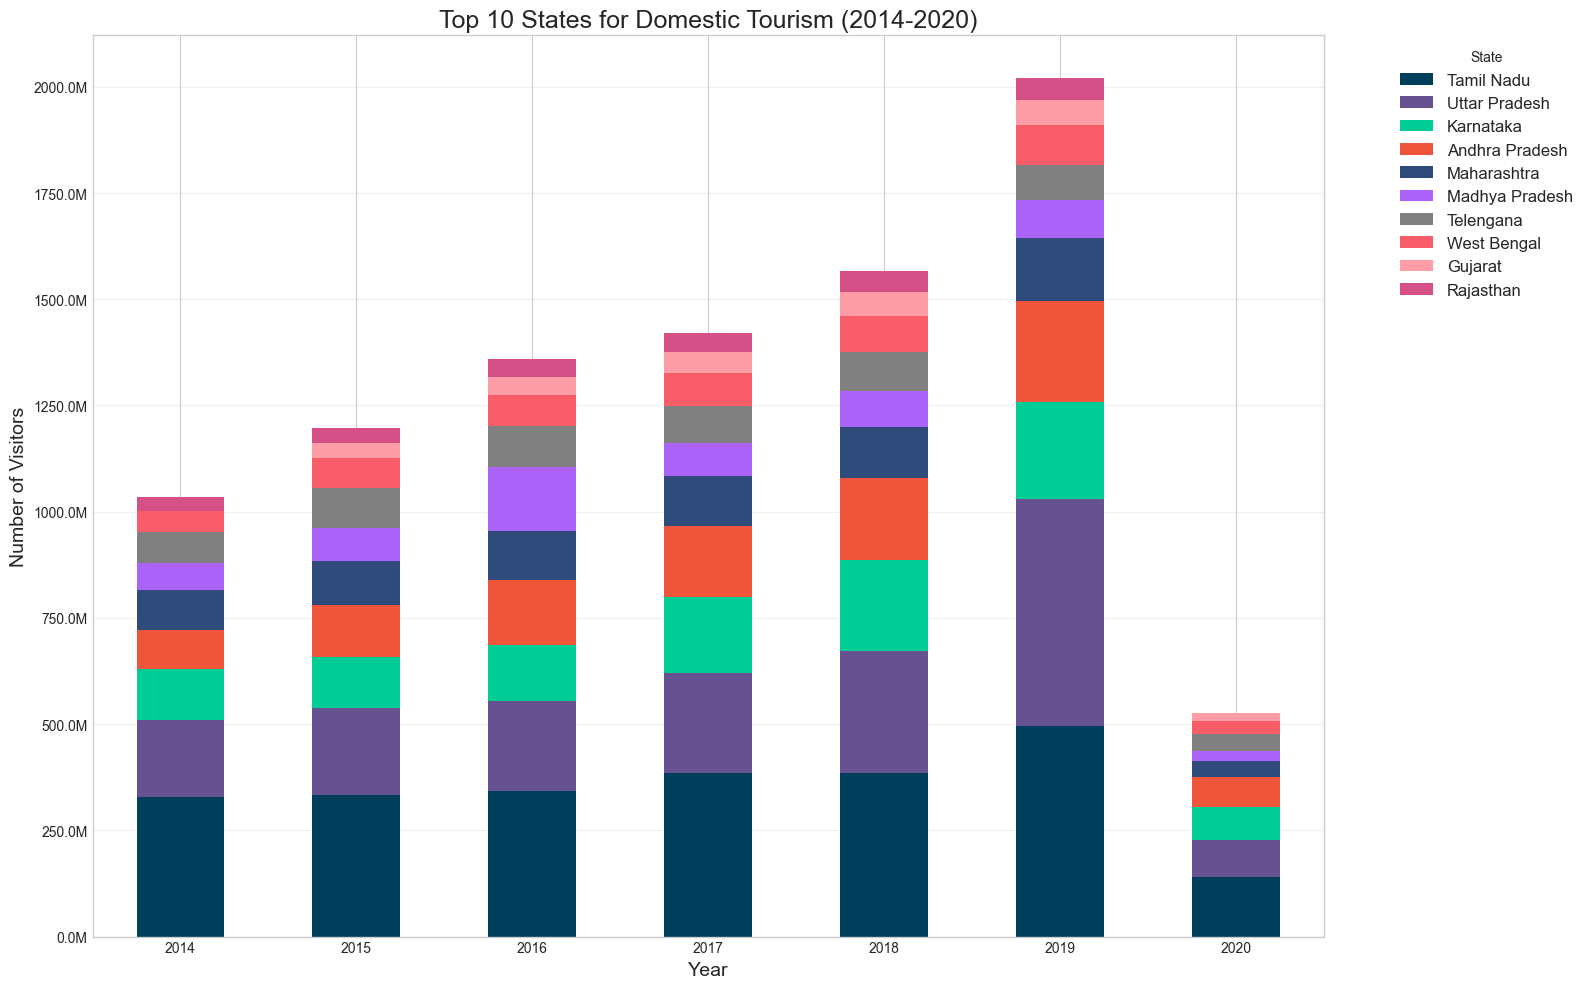

In [12]:
plt.figure(figsize=(16, 10))

# Pivot the data to get one column per state
domestic_pivot = combined_long_df[combined_long_df['type'] == 'Domestic'].pivot_table(
    index='year',
    columns='state',
    values='visitors',
    aggfunc='sum'
)

# Get the top 10 states by total visitors
top_states = analysis_results['top_domestic_states']

# Filter for top states and fill NaN with 0
domestic_pivot = domestic_pivot[top_states].fillna(0)

# Plot the stacked bar chart
domestic_pivot.plot(kind='bar', stacked=True, figsize=(16, 10),
                    color=[state_colors.get(state, '#808080') for state in top_states])

plt.title('Top 10 States for Domestic Tourism (2014-2020)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=14)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M'))

plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

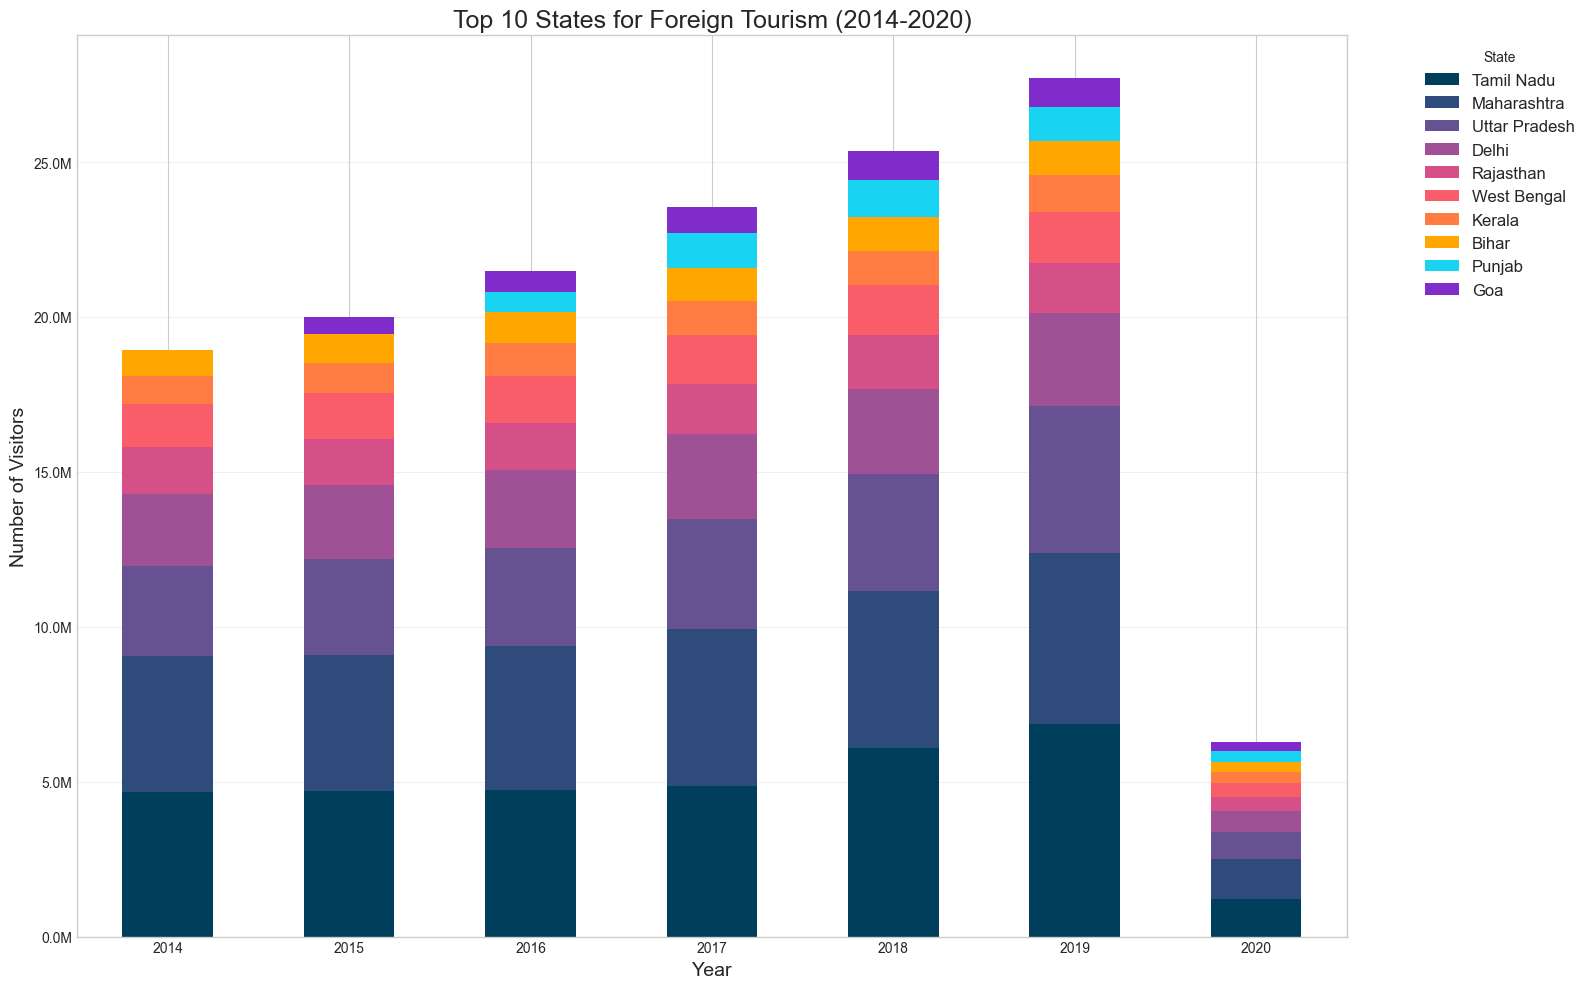

In [13]:
plt.figure(figsize=(16, 10))

# Pivot the data to get one column per state
foreign_pivot = combined_long_df[combined_long_df['type'] == 'Foreign'].pivot_table(
    index='year',
    columns='state',
    values='visitors',
    aggfunc='sum'
)

# Get the top 10 states by total visitors
top_states = analysis_results['top_foreign_states']

# Filter for top states and fill NaN with 0
foreign_pivot = foreign_pivot[top_states].fillna(0)

# Plot the stacked bar chart
foreign_pivot.plot(kind='bar', stacked=True, figsize=(16, 10),
                color=[state_colors.get(state, '#808080') for state in top_states])

plt.title('Top 10 States for Foreign Tourism (2014-2020)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=14)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M'))

plt.tight_layout()
plt.show()

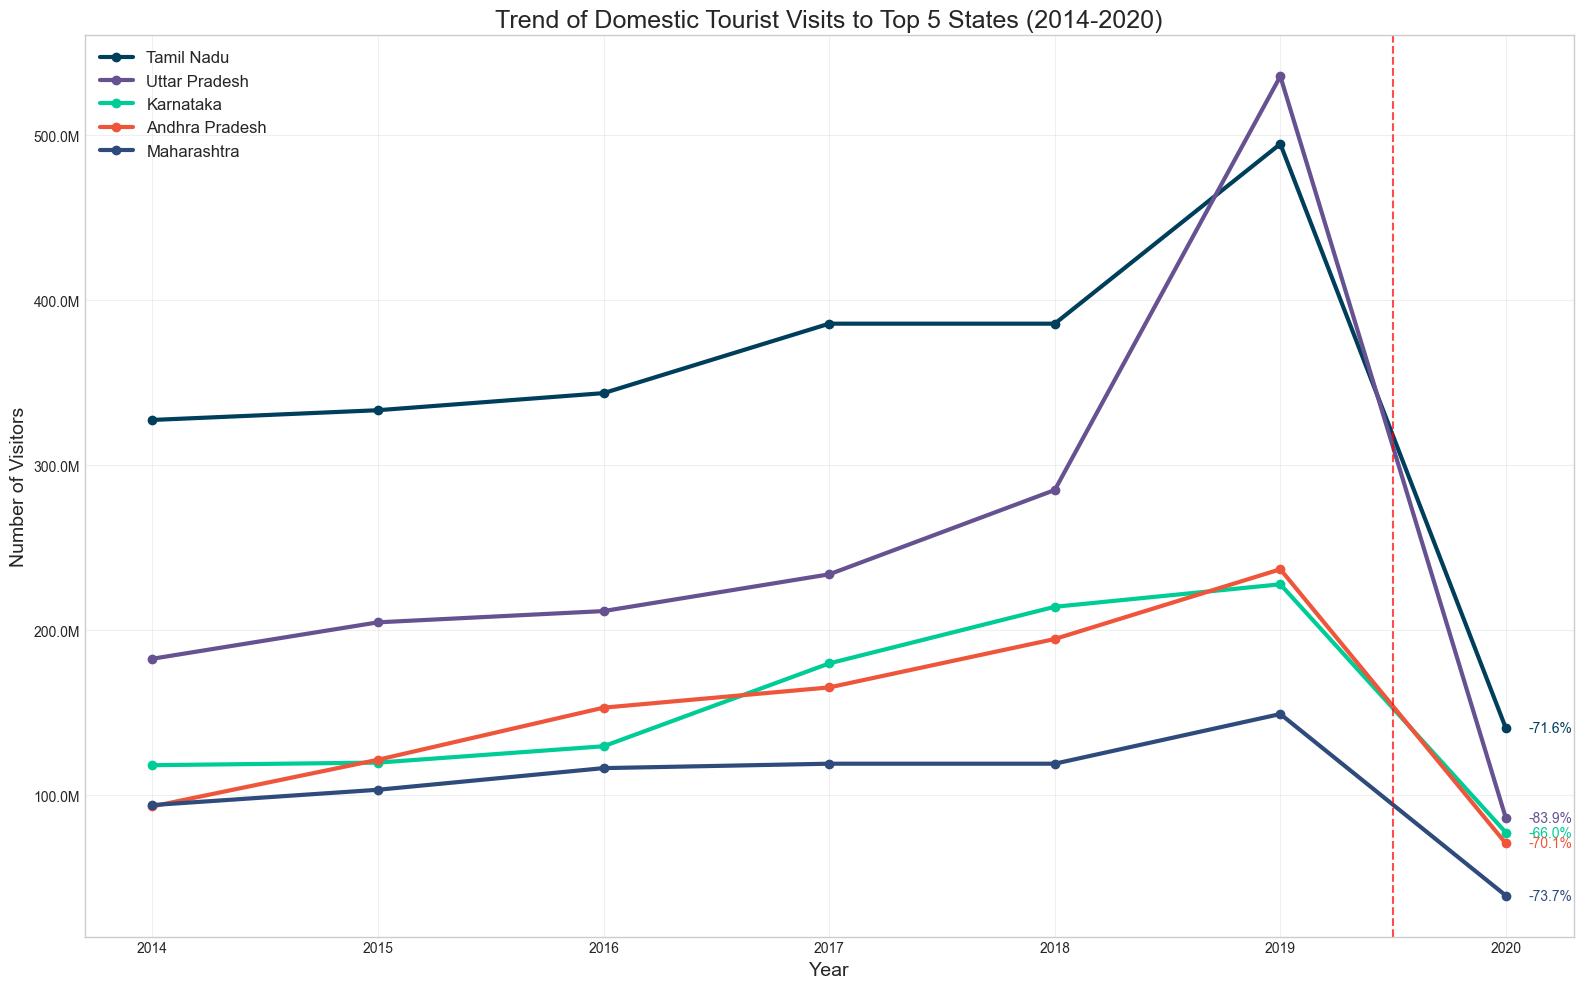

In [14]:
plt.figure(figsize=(16, 10))

# Get the top 5 states
top5_domestic = analysis_results['top_domestic_states'][:5]

# Create a filtered dataframe
filtered_df = combined_long_df[(combined_long_df['type'] == 'Domestic') & 
                            (combined_long_df['state'].isin(top5_domestic))]

# Pivot to get one line per state
trend_df = filtered_df.pivot_table(index='year', columns='state', values='visitors', aggfunc='sum')

# Plot each state
for state in top5_domestic:
    if state in trend_df.columns:
        plt.plot(trend_df.index, trend_df[state], marker='o', linewidth=3, 
                    label=state, color=state_colors.get(state, '#808080'))

plt.title('Trend of Domestic Tourist Visits to Top 5 States (2014-2020)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M'))

# Add a vertical line to mark pre-COVID and COVID periods if 2020 is in the data
if 2020 in trend_df.index:
    plt.axvline(x=2019.5, color='r', linestyle='--', alpha=0.7, label='COVID-19 Impact')
    
    # Annotate the COVID drop
    for state in top5_domestic:
        if state in trend_df.columns and 2019 in trend_df.index and 2020 in trend_df.index:
            pct_change = ((trend_df.loc[2020, state] / trend_df.loc[2019, state]) - 1) * 100
            plt.annotate(f'{pct_change:.1f}%', 
                        xy=(2020, trend_df.loc[2020, state]), 
                        xytext=(2020.1, trend_df.loc[2020, state]),
                        fontsize=10, ha='left', va='center',
                        color=state_colors.get(state, '#808080'))

plt.tight_layout()
plt.show()

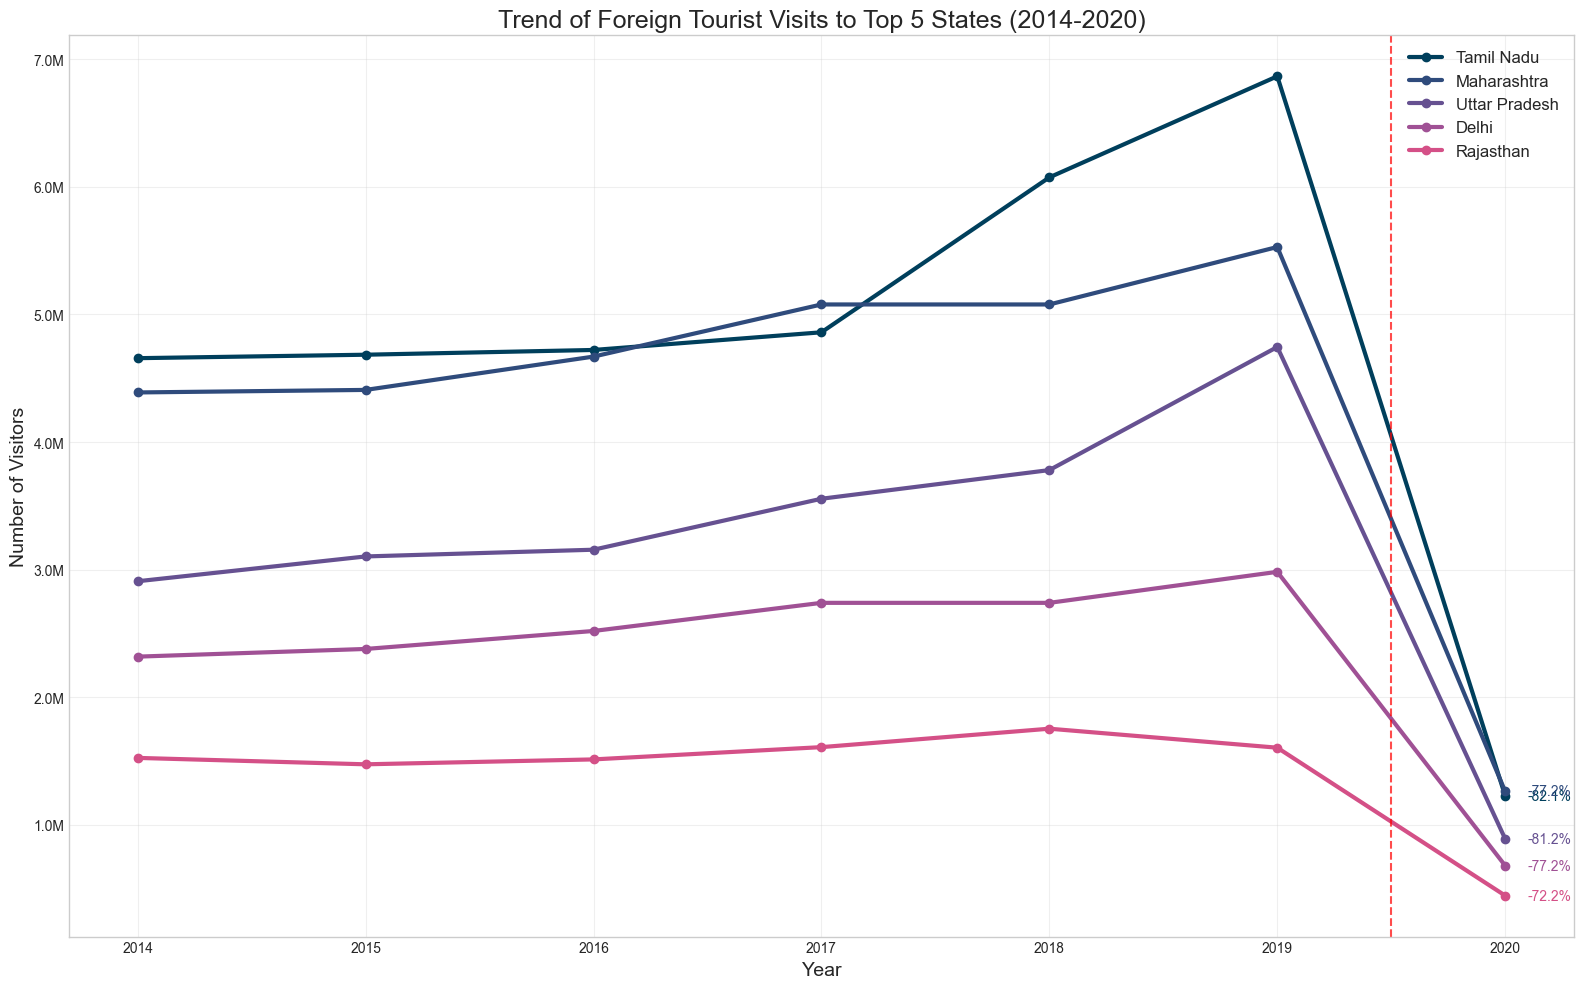

In [15]:
plt.figure(figsize=(16, 10))

# Get the top 5 states
top5_foreign = analysis_results['top_foreign_states'][:5]

# Create a filtered dataframe
filtered_df = combined_long_df[(combined_long_df['type'] == 'Foreign') & 
                            (combined_long_df['state'].isin(top5_foreign))]

# Pivot to get one line per state
trend_df = filtered_df.pivot_table(index='year', columns='state', values='visitors', aggfunc='sum')

# Plot each state
for state in top5_foreign:
    if state in trend_df.columns:
        plt.plot(trend_df.index, trend_df[state], marker='o', linewidth=3, 
                    label=state, color=state_colors.get(state, '#808080'))

plt.title('Trend of Foreign Tourist Visits to Top 5 States (2014-2020)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M'))

# Add a vertical line to mark pre-COVID and COVID periods if 2020 is in the data
if 2020 in trend_df.index:
    plt.axvline(x=2019.5, color='r', linestyle='--', alpha=0.7, label='COVID-19 Impact')
    
    # Annotate the COVID drop
    for state in top5_foreign:
        if state in trend_df.columns and 2019 in trend_df.index and 2020 in trend_df.index:
            pct_change = ((trend_df.loc[2020, state] / trend_df.loc[2019, state]) - 1) * 100
            plt.annotate(f'{pct_change:.1f}%', 
                        xy=(2020, trend_df.loc[2020, state]), 
                        xytext=(2020.1, trend_df.loc[2020, state]),
                        fontsize=10, ha='left', va='center',
                        color=state_colors.get(state, '#808080'))

plt.tight_layout()
plt.show()

<Figure size 1600x1200 with 0 Axes>

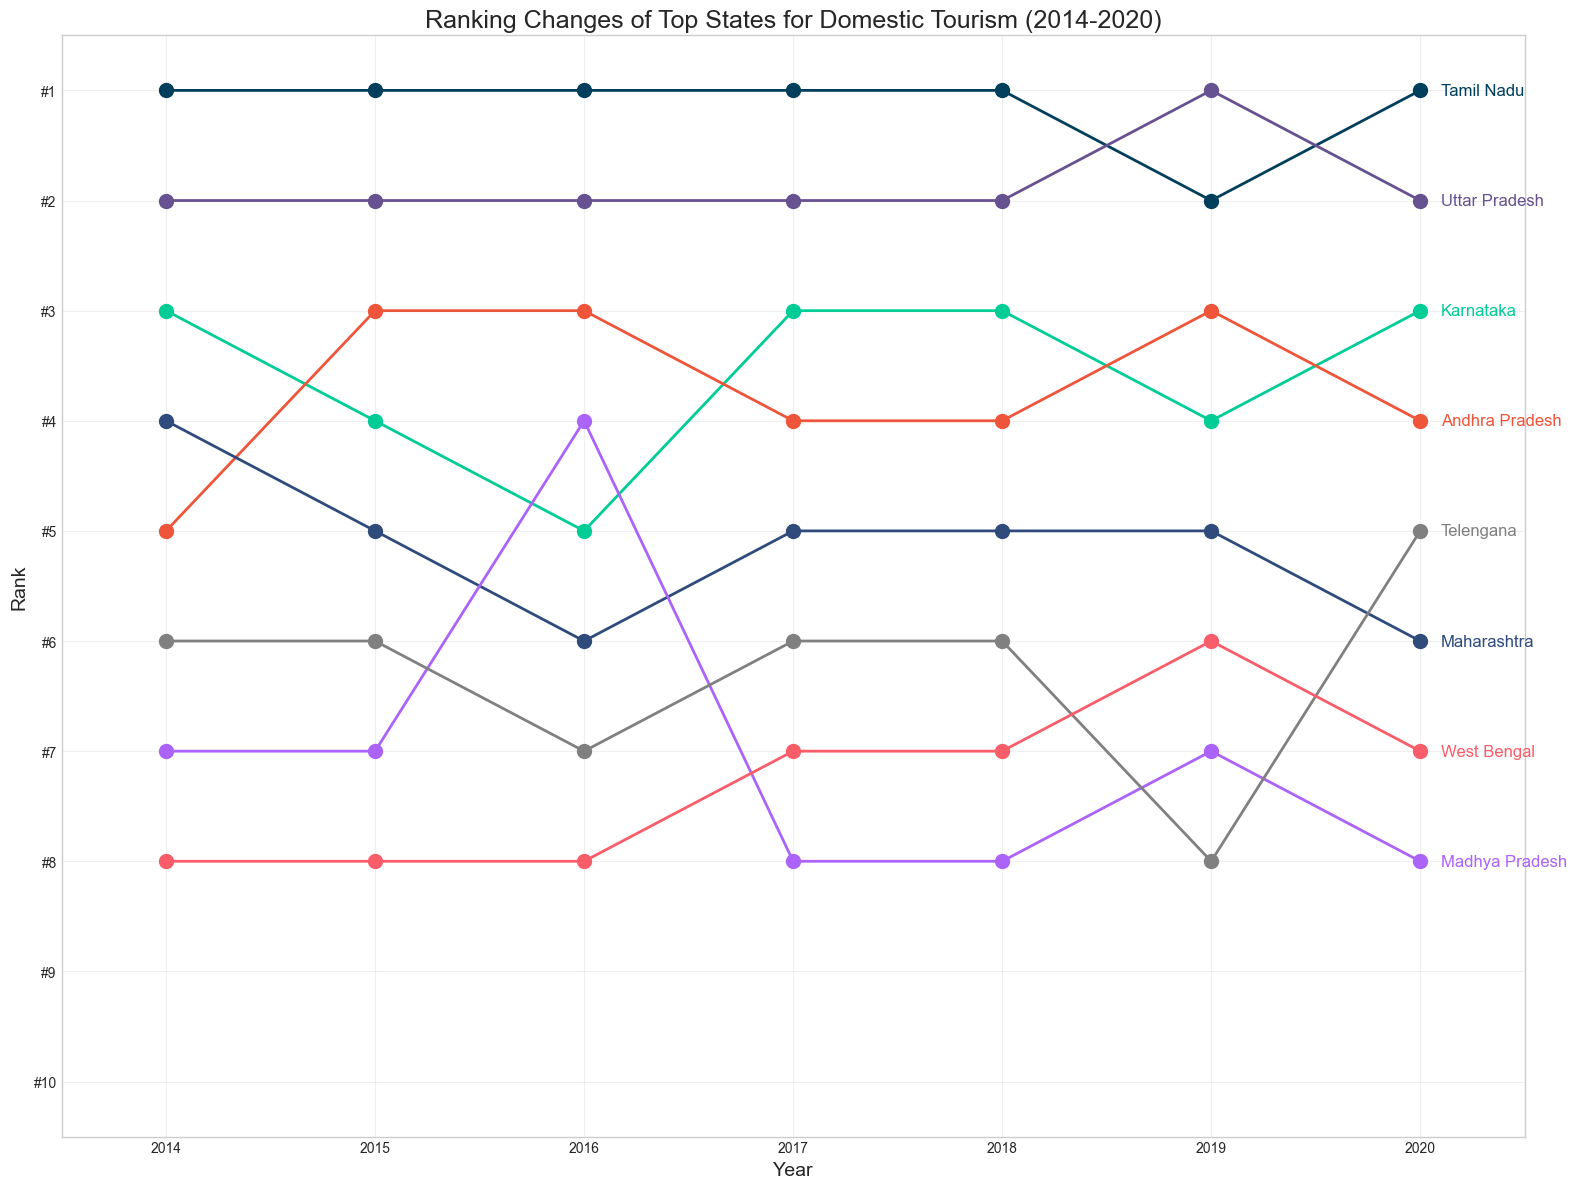

In [16]:
plt.figure(figsize=(16, 12))

# Select states for analysis (use top 8 states)
selected_states = analysis_results['top_domestic_states'][:8]

# Set up the plot
fig, ax = plt.subplots(figsize=(16, 12))

# Initialize a dictionary to store the rank data for each state
state_ranks = {state: [] for state in selected_states}

# Get rank data for each state by year
for year in sorted(domestic_df.index):
    for state in selected_states:
        # Find which rank this state had in this year
        rank = None
        for i in range(1, 11):
            if domestic_df.loc[year, f'top{i}_state'] == state:
                rank = i
                break
        
        if rank is not None:
            state_ranks[state].append((year, rank))

# Plot data for each state
for state in selected_states:
    # Skip states with no rank data
    if not state_ranks[state]:
        continue
    
    # Extract years and ranks
    years = [item[0] for item in state_ranks[state]]
    ranks = [item[1] for item in state_ranks[state]]
    
    # Plot the ranks
    ax.plot(years, ranks, marker='o', linewidth=2, label=state, 
            color=state_colors.get(state, '#808080'), markersize=10)
    
    # Add the state name next to the last point
    last_year = years[-1]
    last_rank = ranks[-1]
    ax.text(last_year + 0.1, last_rank, state, fontsize=12, 
            color=state_colors.get(state, '#808080'), va='center')

# Invert y-axis so that rank 1 is at the top
ax.invert_yaxis()

# Set the axis limits
ax.set_xlim(min(domestic_df.index) - 0.5, max(domestic_df.index) + 0.5)
ax.set_ylim(10.5, 0.5)  # Ranks go from 1 to 10

# Set the grid
ax.grid(True, alpha=0.3)

# Set the title and labels
ax.set_title('Ranking Changes of Top States for Domestic Tourism (2014-2020)', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Rank', fontsize=14)

# Set the y-tick labels
ax.set_yticks(range(1, 11))
ax.set_yticklabels([f'#{i}' for i in range(1, 11)])

# Set the x-tick labels
ax.set_xticks(sorted(domestic_df.index))

plt.tight_layout()
plt.show()

<Figure size 1600x1200 with 0 Axes>

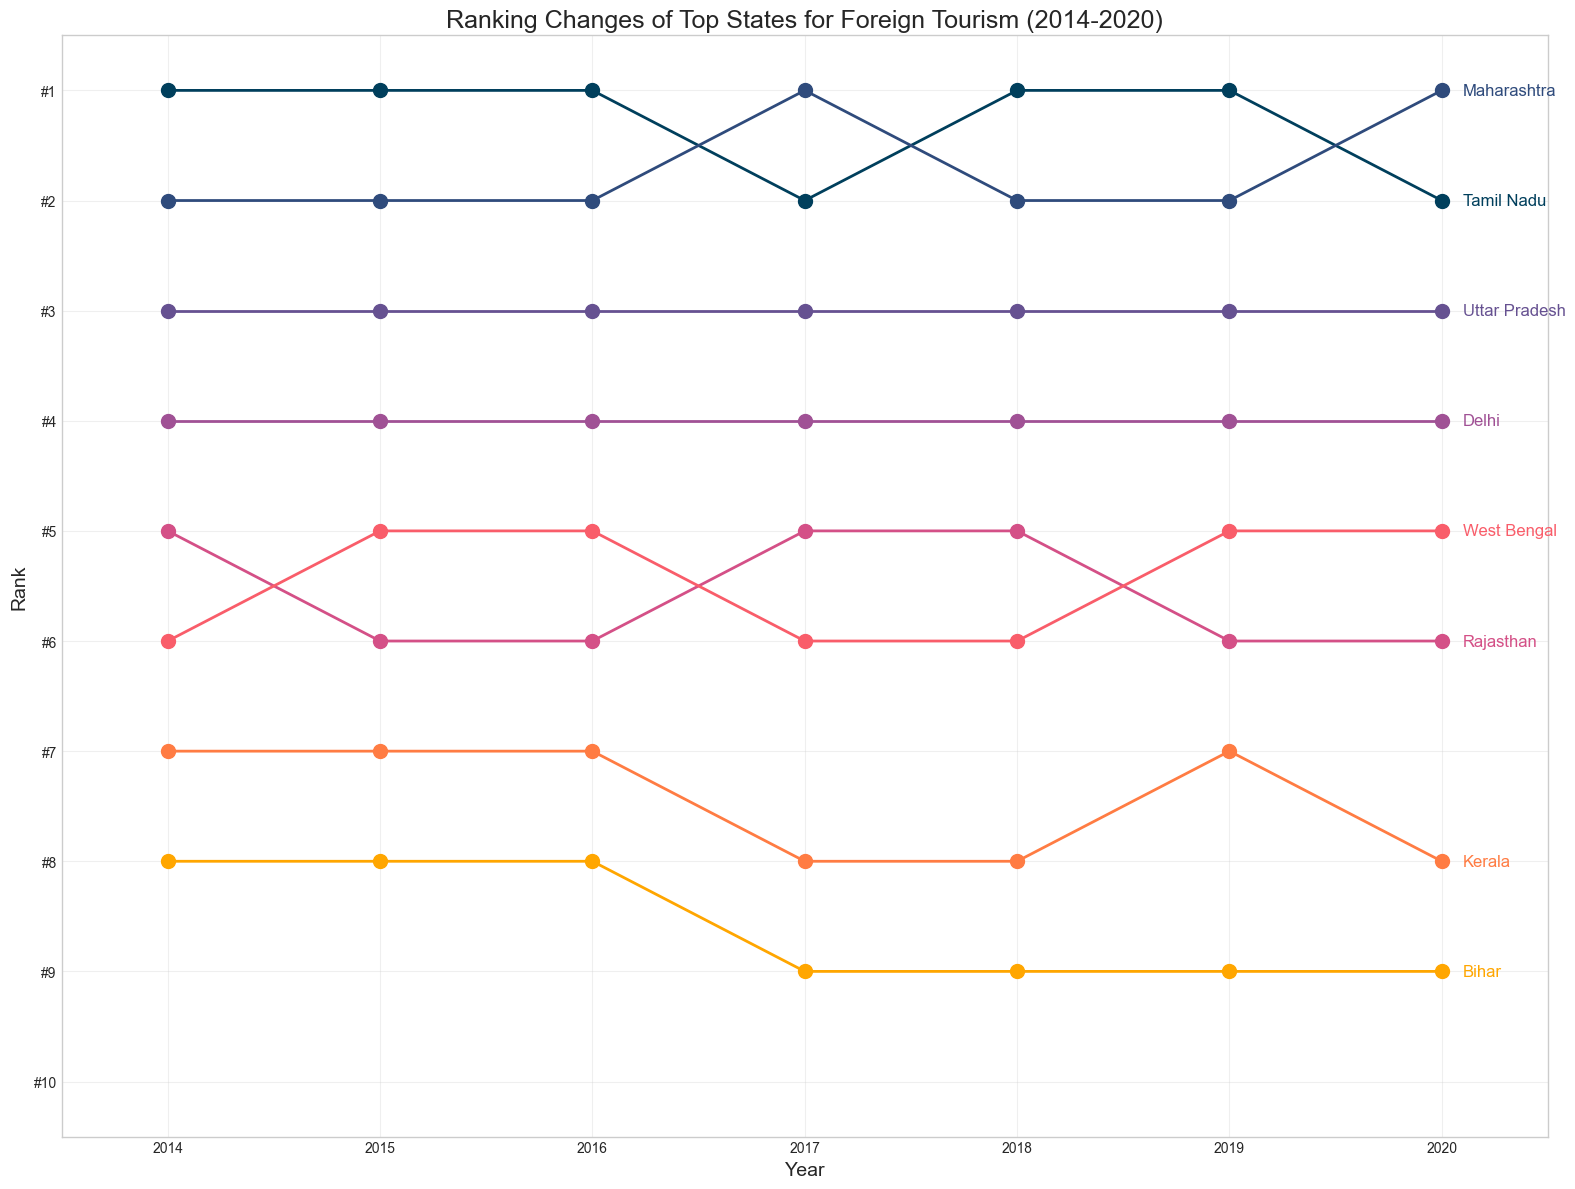

In [17]:
plt.figure(figsize=(16, 12))

# Select states for analysis (use top 8 states)
selected_states = analysis_results['top_foreign_states'][:8]

# Set up the plot
fig, ax = plt.subplots(figsize=(16, 12))

# Initialize a dictionary to store the rank data for each state
state_ranks = {state: [] for state in selected_states}

# Get rank data for each state by year
for year in sorted(foreign_df.index):
    for state in selected_states:
        # Find which rank this state had in this year
        rank = None
        for i in range(1, 11):
            if foreign_df.loc[year, f'top{i}_state'] == state:
                rank = i
                break
        
        if rank is not None:
            state_ranks[state].append((year, rank))

# Plot data for each state
for state in selected_states:
    # Skip states with no rank data
    if not state_ranks[state]:
        continue
    
    # Extract years and ranks
    years = [item[0] for item in state_ranks[state]]
    ranks = [item[1] for item in state_ranks[state]]
    
    # Plot the ranks
    ax.plot(years, ranks, marker='o', linewidth=2, label=state, 
            color=state_colors.get(state, '#808080'), markersize=10)
    
    # Add the state name next to the last point
    last_year = years[-1]
    last_rank = ranks[-1]
    ax.text(last_year + 0.1, last_rank, state, fontsize=12, 
            color=state_colors.get(state, '#808080'), va='center')

# Invert y-axis so that rank 1 is at the top
ax.invert_yaxis()

# Set the axis limits
ax.set_xlim(min(foreign_df.index) - 0.5, max(foreign_df.index) + 0.5)
ax.set_ylim(10.5, 0.5)  # Ranks go from 1 to 10

# Set the grid
ax.grid(True, alpha=0.3)

# Set the title and labels
ax.set_title('Ranking Changes of Top States for Foreign Tourism (2014-2020)', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Rank', fontsize=14)

# Set the y-tick labels
ax.set_yticks(range(1, 11))
ax.set_yticklabels([f'#{i}' for i in range(1, 11)])

# Set the x-tick labels
ax.set_xticks(sorted(foreign_df.index))

plt.tight_layout()
plt.show()

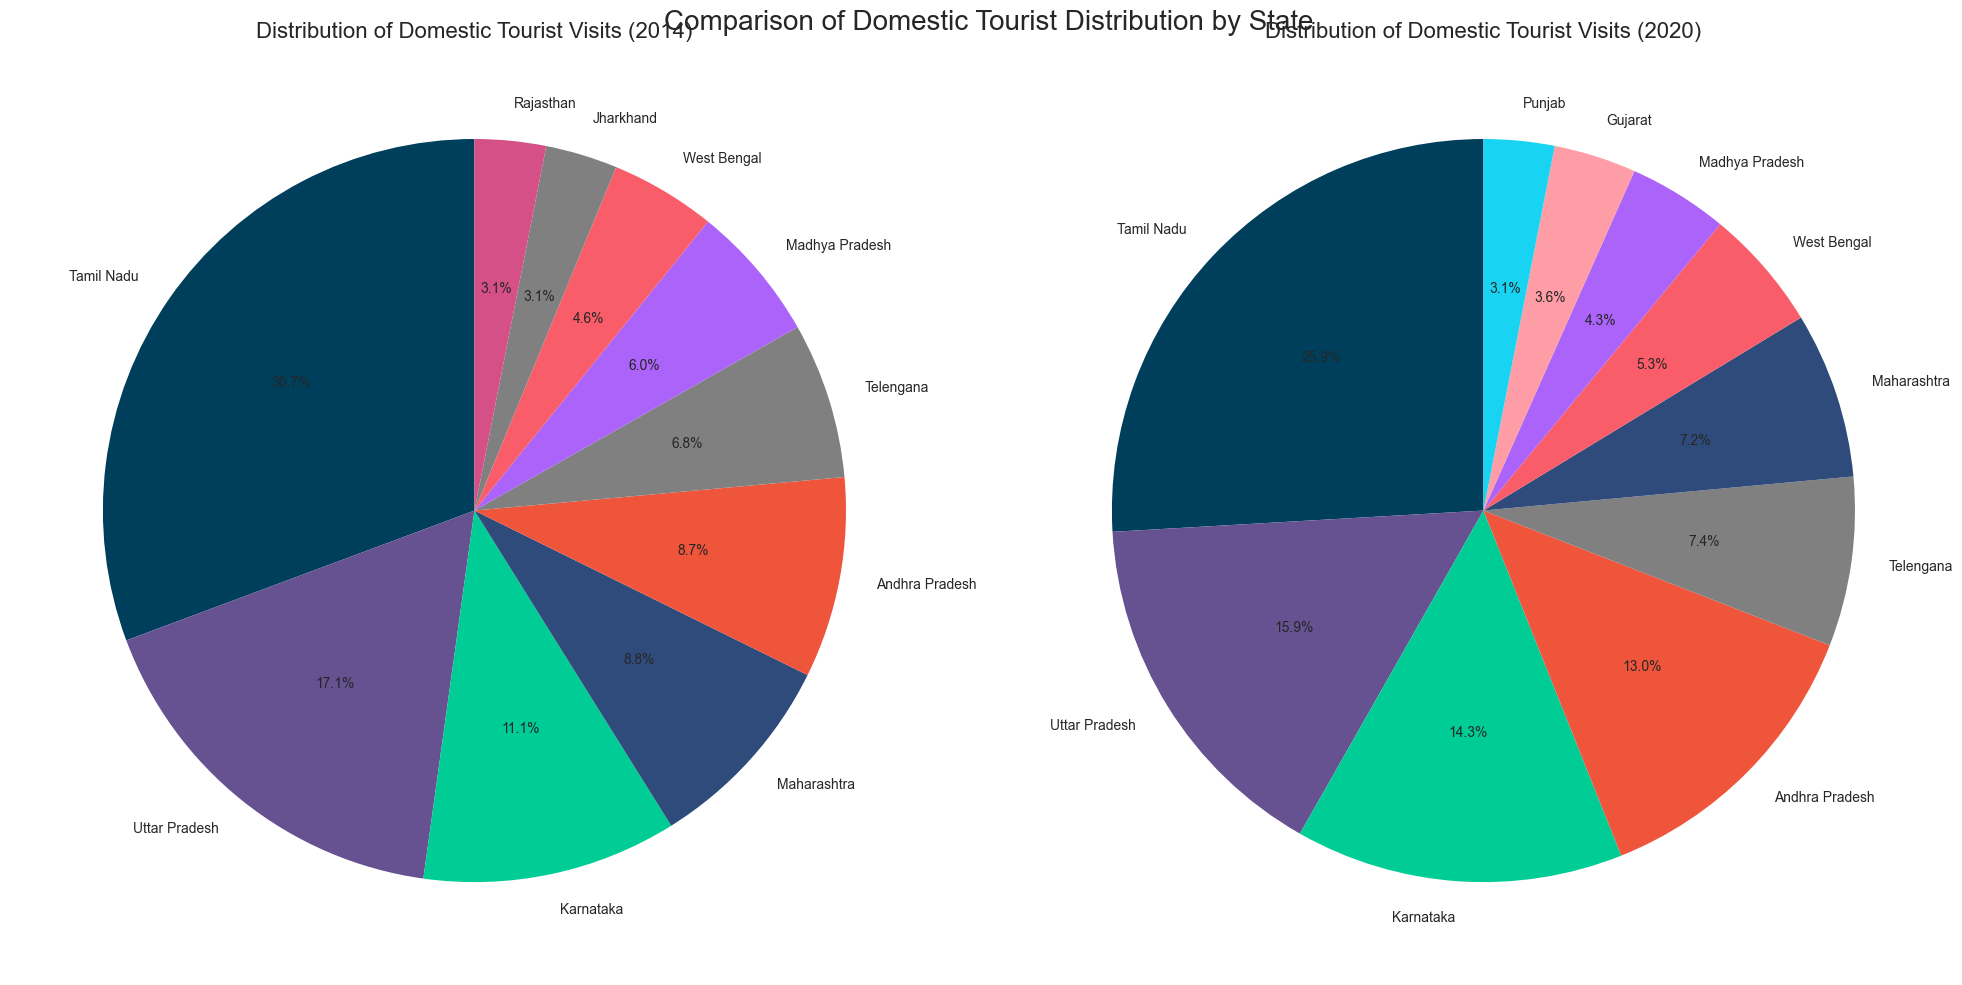

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Get the first and last years
first_year = min(domestic_df.index)
last_year = max(domestic_df.index)

# Create data for the first year
first_year_data = [(domestic_df.loc[first_year, f'top{i}_state'], domestic_df.loc[first_year, f'top{i}_ftv']) 
                    for i in range(1, 11)]

# Sort by number of tourists (descending)
first_year_data.sort(key=lambda x: x[1], reverse=True)

# Extract states and visitors
first_year_states = [item[0] for item in first_year_data]
first_year_visitors = [item[1] for item in first_year_data]

# Create a pie chart for the first year
ax1.pie(first_year_visitors, labels=first_year_states, autopct='%1.1f%%', startangle=90,
        colors=[state_colors.get(state, '#808080') for state in first_year_states])
ax1.set_title(f'Distribution of Domestic Tourist Visits ({first_year})', fontsize=16)

# Create data for the last year
last_year_data = [(domestic_df.loc[last_year, f'top{i}_state'], domestic_df.loc[last_year, f'top{i}_ftv']) 
                    for i in range(1, 11)]

# Sort by number of tourists (descending)
last_year_data.sort(key=lambda x: x[1], reverse=True)

# Extract states and visitors
last_year_states = [item[0] for item in last_year_data]
last_year_visitors = [item[1] for item in last_year_data]

# Create a pie chart for the last year
ax2.pie(last_year_visitors, labels=last_year_states, autopct='%1.1f%%', startangle=90,
        colors=[state_colors.get(state, '#808080') for state in last_year_states])
ax2.set_title(f'Distribution of Domestic Tourist Visits ({last_year})', fontsize=16)

plt.suptitle('Comparison of Domestic Tourist Distribution by State', fontsize=20, y=0.98)
plt.tight_layout()
plt.show()

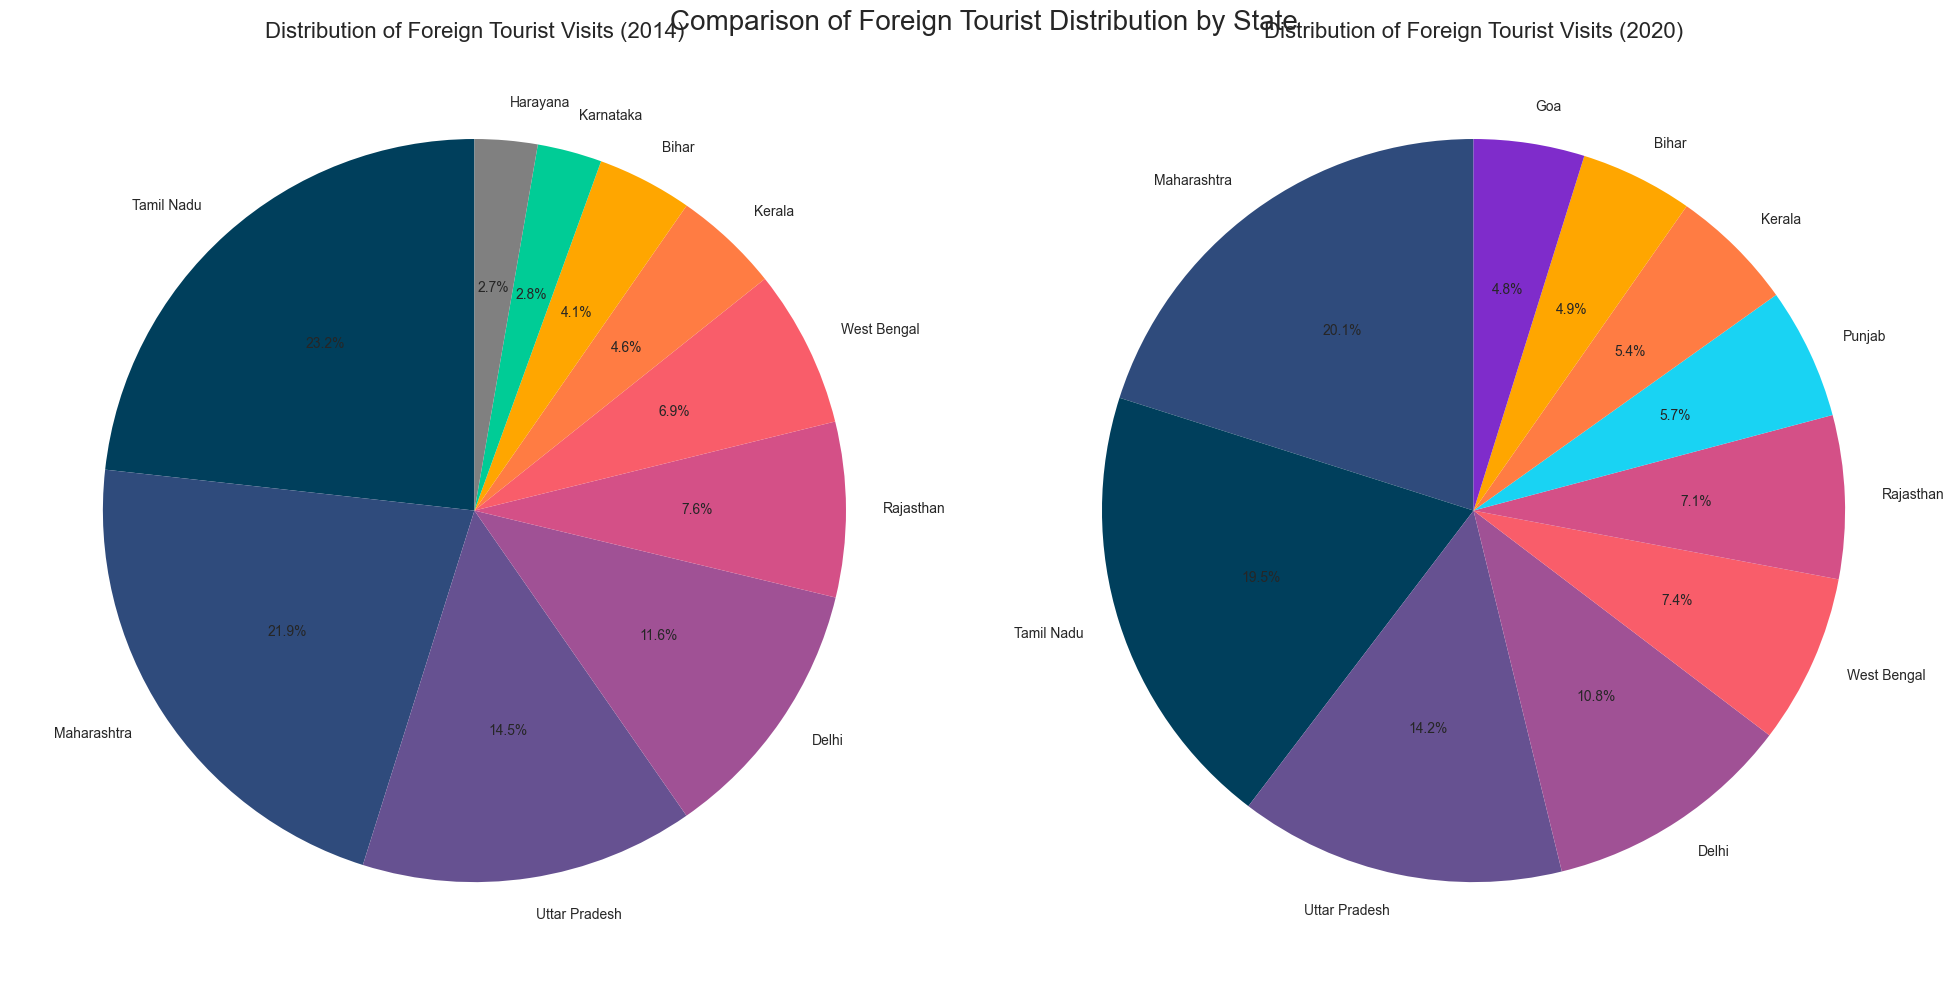

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Get the first and last years
first_year = min(foreign_df.index)
last_year = max(foreign_df.index)

# Create data for the first year
first_year_data = [(foreign_df.loc[first_year, f'top{i}_state'], foreign_df.loc[first_year, f'top{i}_ftv']) 
                    for i in range(1, 11)]

# Sort by number of tourists (descending)
first_year_data.sort(key=lambda x: x[1], reverse=True)

# Extract states and visitors
first_year_states = [item[0] for item in first_year_data]
first_year_visitors = [item[1] for item in first_year_data]

# Create a pie chart for the first year
ax1.pie(first_year_visitors, labels=first_year_states, autopct='%1.1f%%', startangle=90,
        colors=[state_colors.get(state, '#808080') for state in first_year_states])
ax1.set_title(f'Distribution of Foreign Tourist Visits ({first_year})', fontsize=16)

# Create data for the last year
last_year_data = [(foreign_df.loc[last_year, f'top{i}_state'], foreign_df.loc[last_year, f'top{i}_ftv']) 
                    for i in range(1, 11)]

# Sort by number of tourists (descending)
last_year_data.sort(key=lambda x: x[1], reverse=True)

# Extract states and visitors
last_year_states = [item[0] for item in last_year_data]
last_year_visitors = [item[1] for item in last_year_data]

# Create a pie chart for the last year
ax2.pie(last_year_visitors, labels=last_year_states, autopct='%1.1f%%', startangle=90,
        colors=[state_colors.get(state, '#808080') for state in last_year_states])
ax2.set_title(f'Distribution of Foreign Tourist Visits ({last_year})', fontsize=16)

plt.suptitle('Comparison of Foreign Tourist Distribution by State', fontsize=20, y=0.98)
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

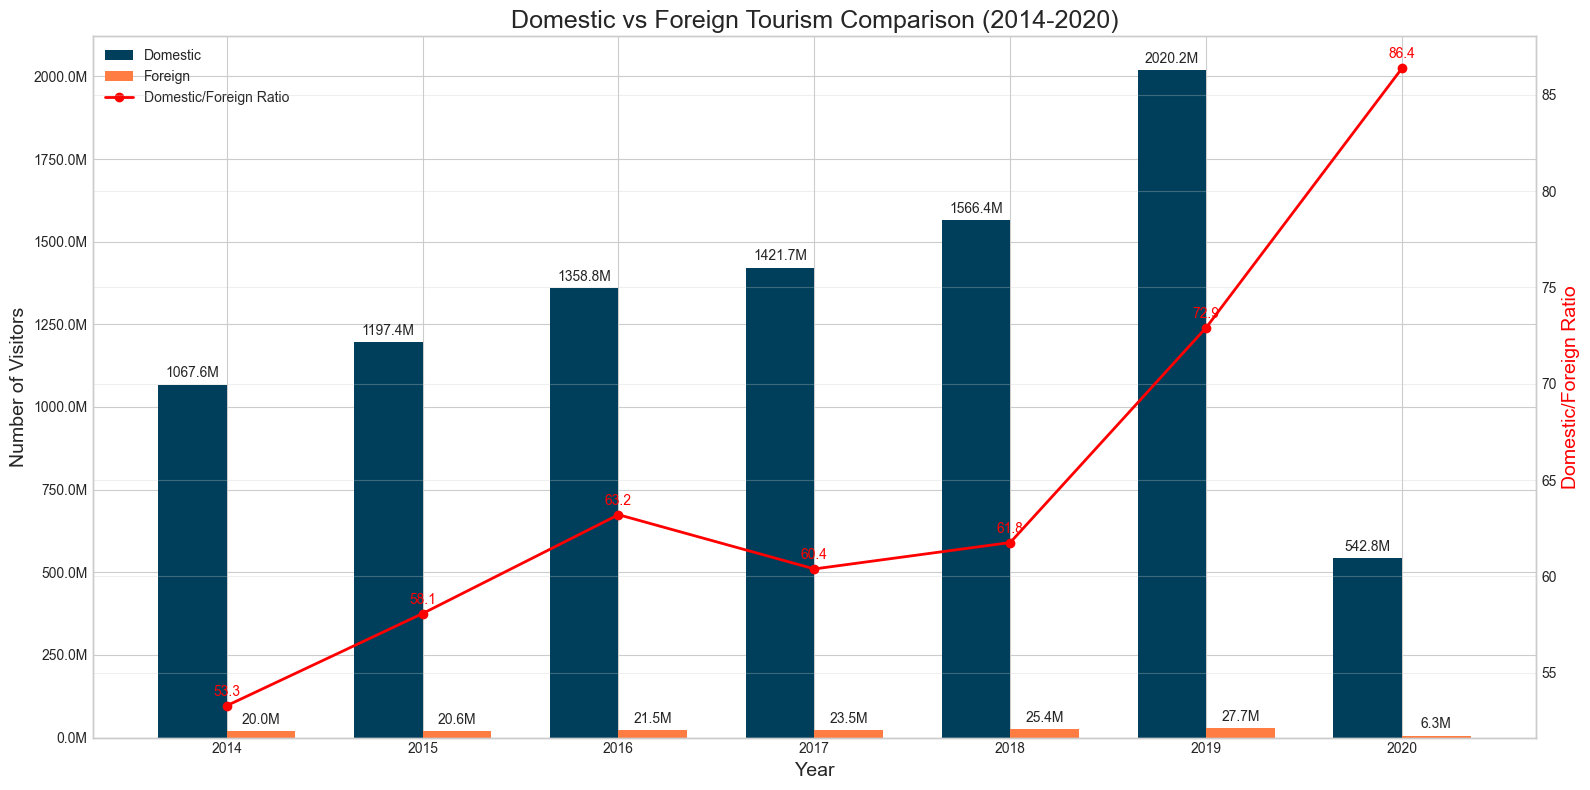

In [20]:
plt.figure(figsize=(16, 8))

# Get yearly totals
yearly_totals = analysis_results['yearly_totals']

# Create a bar chart
x = np.arange(len(yearly_totals.index))
width = 0.35

fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot domestic and foreign tourism bars
rects1 = ax1.bar(x - width/2, yearly_totals['Domestic'], width, label='Domestic', color='#003f5c')
rects2 = ax1.bar(x + width/2, yearly_totals['Foreign'], width, label='Foreign', color='#ff7c43')

# Add a secondary y-axis for the ratio
ax2 = ax1.twinx()
ax2.plot(x, yearly_totals['Ratio'], 'ro-', linewidth=2, label='Domestic/Foreign Ratio')

# Add labels and title
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Visitors', fontsize=14)
ax2.set_ylabel('Domestic/Foreign Ratio', fontsize=14, color='r')
ax1.set_title('Domestic vs Foreign Tourism Comparison (2014-2020)', fontsize=18)

# Set x-tick labels
ax1.set_xticks(x)
ax1.set_xticklabels(yearly_totals.index)

# Format y-axis to show values in millions
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M'))

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Add data labels on bars
for rect in rects1:
    height = rect.get_height()
    ax1.annotate(f'{height/1000000:.1f}M',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax1.annotate(f'{height/1000000:.1f}M',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add ratio values
for i, ratio in enumerate(yearly_totals['Ratio']):
    ax2.annotate(f'{ratio:.1f}',
                xy=(x[i], ratio),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                color='r')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1800x1200 with 0 Axes>

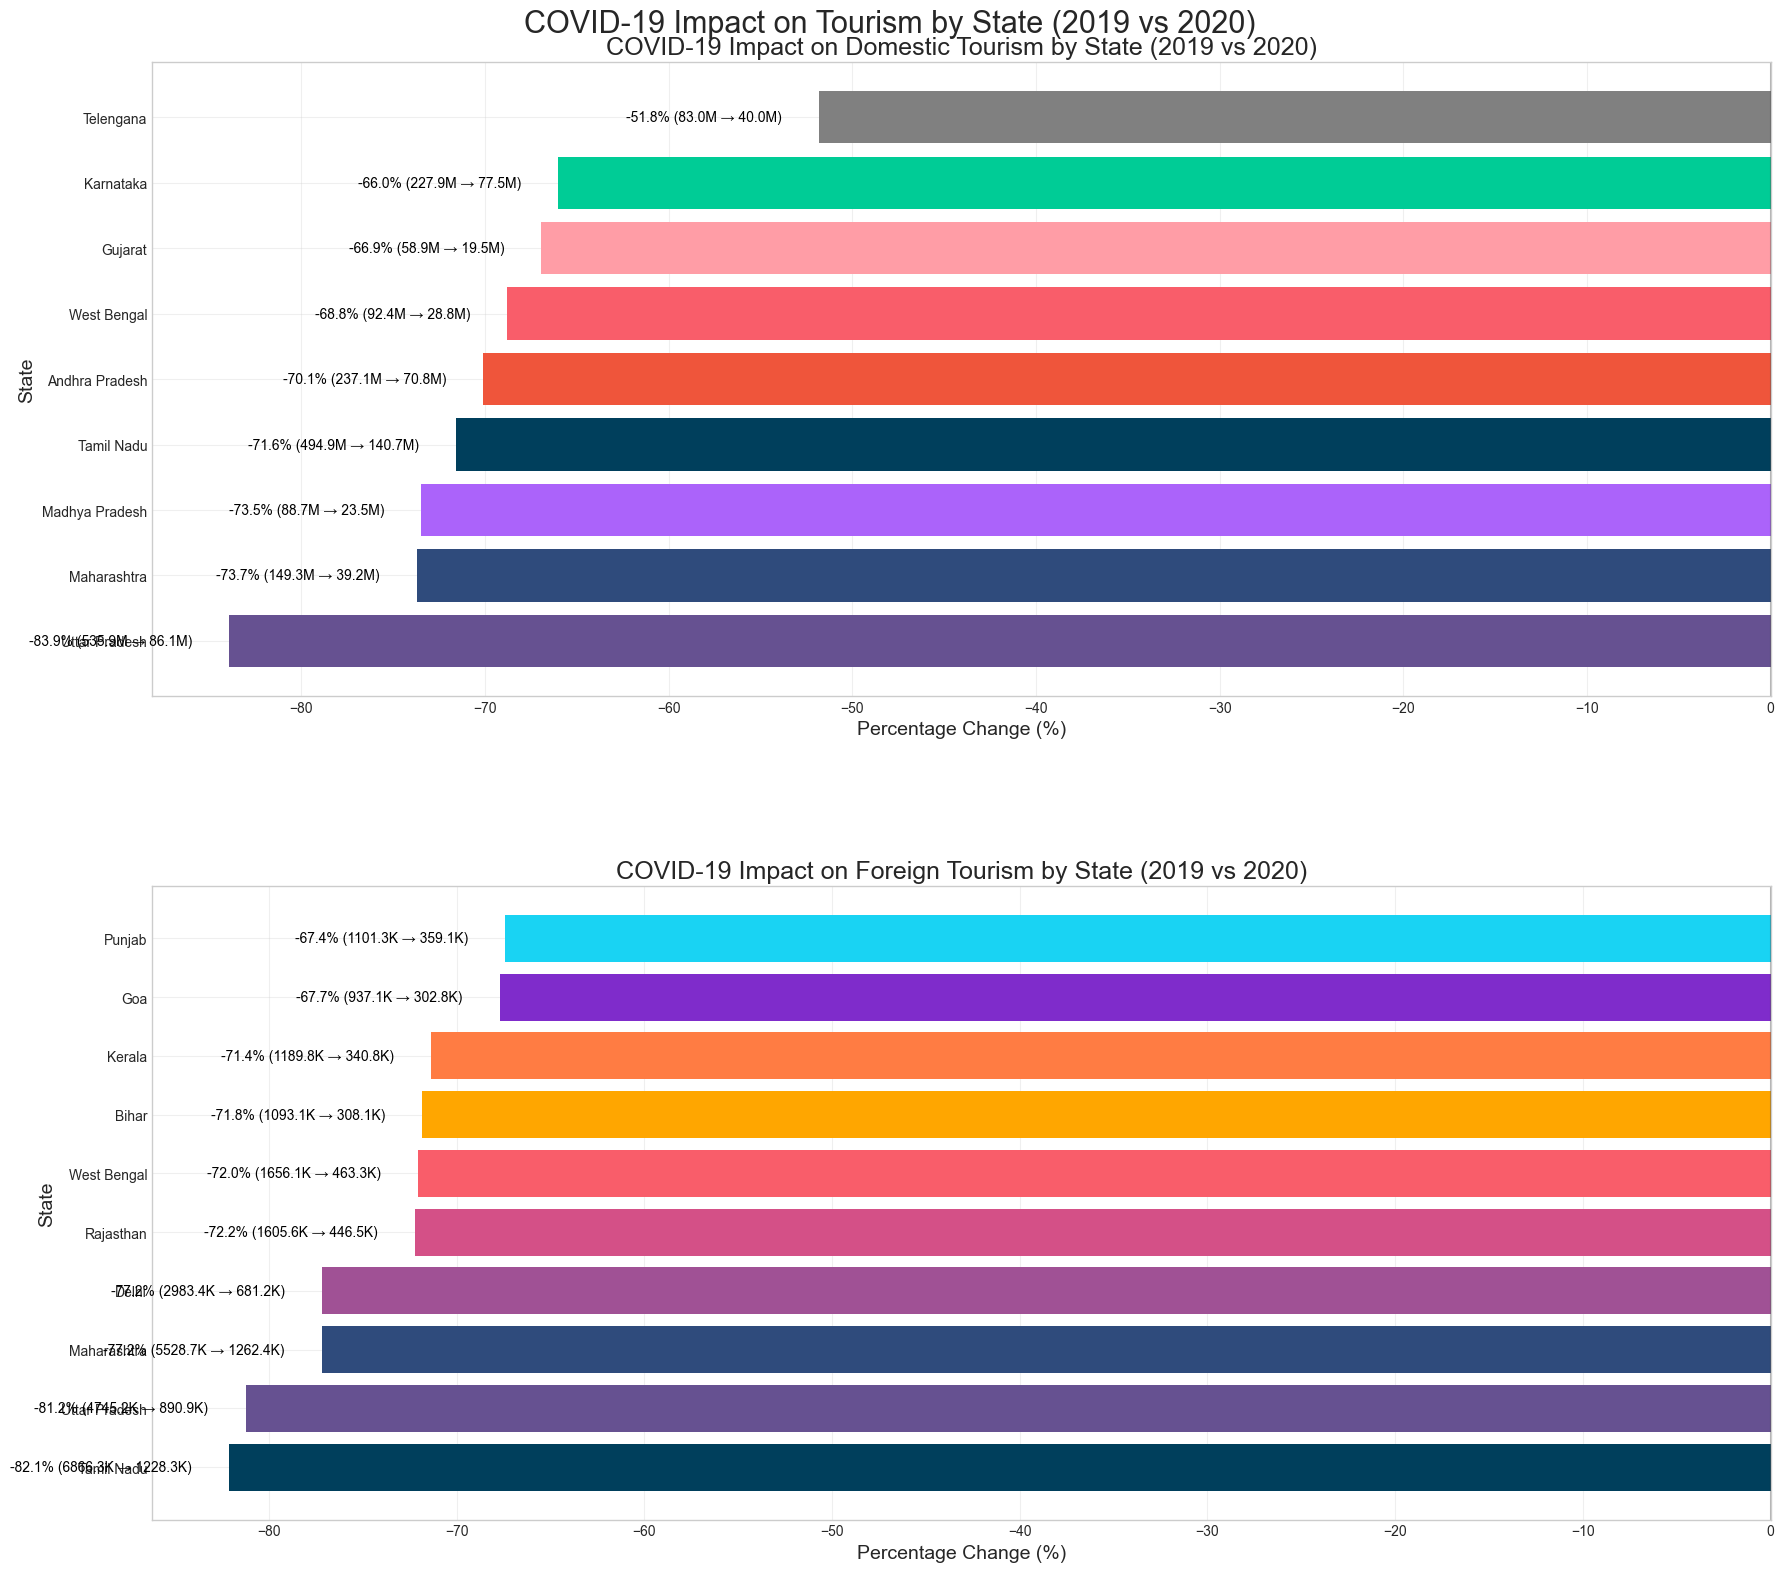

In [21]:
if 'covid_impact' in analysis_results:
    plt.figure(figsize=(18, 12))
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 16))
    
    # Plot impact on domestic tourism
    domestic_comparison = analysis_results['covid_impact']['domestic_comparison']
    
    # Sort by percentage change
    domestic_comparison = domestic_comparison.sort_values('pct_change')
    
    # Create horizontal bar chart
    bars1 = ax1.barh(domestic_comparison['state'], domestic_comparison['pct_change'],
                    color=[state_colors.get(state, '#808080') for state in domestic_comparison['state']])
    
    ax1.set_title('COVID-19 Impact on Domestic Tourism by State (2019 vs 2020)', fontsize=18)
    ax1.set_xlabel('Percentage Change (%)', fontsize=14)
    ax1.set_ylabel('State', fontsize=14)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax1.grid(True, alpha=0.3)
    
    # Add data labels
    for i, bar in enumerate(bars1):
        width = bar.get_width()
        label_x = width - 2 if width < 0 else width + 2
        ha = 'right' if width < 0 else 'left'
        
        # Format the label to show both the percentage and the actual numbers
        visitors_2019 = domestic_comparison.iloc[i]['visitors_2019']
        visitors_2020 = domestic_comparison.iloc[i]['visitors_2020']
        label = f"{width:.1f}% ({visitors_2019/1000000:.1f}M → {visitors_2020/1000000:.1f}M)"
        
        ax1.text(label_x, bar.get_y() + bar.get_height()/2, label,
                ha=ha, va='center', fontsize=10, color='black')
    
    # Plot impact on foreign tourism
    foreign_comparison = analysis_results['covid_impact']['foreign_comparison']
    
    # Sort by percentage change
    foreign_comparison = foreign_comparison.sort_values('pct_change')
    
    # Create horizontal bar chart
    bars2 = ax2.barh(foreign_comparison['state'], foreign_comparison['pct_change'],
                    color=[state_colors.get(state, '#808080') for state in foreign_comparison['state']])
    
    ax2.set_title('COVID-19 Impact on Foreign Tourism by State (2019 vs 2020)', fontsize=18)
    ax2.set_xlabel('Percentage Change (%)', fontsize=14)
    ax2.set_ylabel('State', fontsize=14)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax2.grid(True, alpha=0.3)
    
    # Add data labels
    for i, bar in enumerate(bars2):
        width = bar.get_width()
        label_x = width - 2 if width < 0 else width + 2
        ha = 'right' if width < 0 else 'left'
        
        # Format the label to show both the percentage and the actual numbers
        visitors_2019 = foreign_comparison.iloc[i]['visitors_2019']
        visitors_2020 = foreign_comparison.iloc[i]['visitors_2020']
        label = f"{width:.1f}% ({visitors_2019/1000:.1f}K → {visitors_2020/1000:.1f}K)"
        
        ax2.text(label_x, bar.get_y() + bar.get_height()/2, label,
                ha=ha, va='center', fontsize=10, color='black')
    
    plt.suptitle('COVID-19 Impact on Tourism by State (2019 vs 2020)', fontsize=22, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)
    plt.show()